### Ridge Regression
1. Ridge regression is also known as L2 Regularization, is a technique used in linear regression to address the problem of multicollinearity among predictor variables
2. Multicollinearity coccurs when indepensent variables in a regression model are highly correlated, which can lead to unreliable & unstable estimates of regression coefficients
3. Ridge regression mitigates this issue by adding a regularization term to the ordinary least squares(OLS) objective function, which penalizes large coefficients and thus reduces their variance

### How Ridge Regression Addresses Overfitting and Multicollinearity?

1. Overfitting occurs when a model becomes too complex and fits noise in the training data, leading to poor generalization on new data.
2. Ridge regression combats overfitting by adding a penality term(L2) to the ordinary least squares(OLS) objective function
3. This penality discourages the modek from using large values for the coeffcients(the numbers multiplying the features)
4. It forces the model to keep these coefficients small
5. By making the coefficients smaller and closer to zero, ridge regression simplifies the model and reduces its sensitivity to random fluctuations or noise in the data.
6.  This makes the model less likely to overfit and helps it perform better on new, unseen data, improving its overall accuracy and reliability.

#### Example

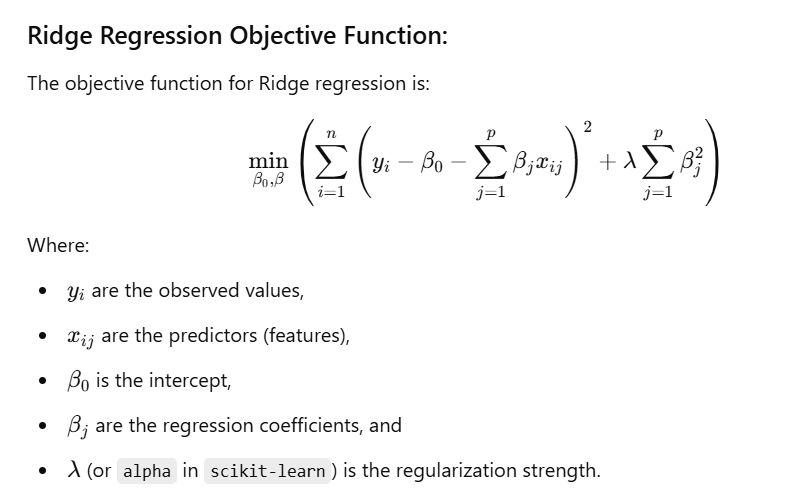

####  sum of the squares of the coefficients.
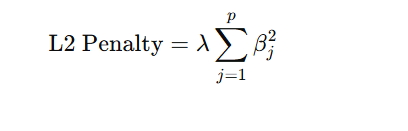
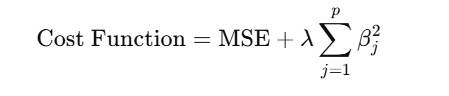

Mean Squared Error: 91302978.46
Coefficients:
         Feature  Coefficient
0  SquareFootage   402.966075
1       Bedrooms   474.852568
2      Bathrooms   186.821734
3       Location  1161.790011
4      YearBuilt  4456.794061


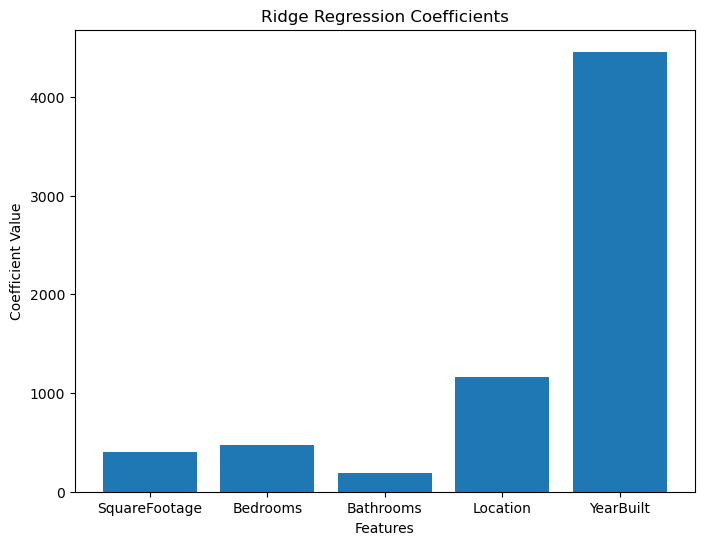

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Simulating a dataset
np.random.seed(42)

# Features (5 features for houses)
n = 100  # number of samples
X = pd.DataFrame({
    'SquareFootage': np.random.normal(2000, 500, n),
    'Bedrooms': np.random.randint(1, 6, n),
    'Bathrooms': np.random.randint(1, 4, n),
    'Location': np.random.randint(1, 10, n),
    'YearBuilt': np.random.randint(1970, 2020, n)
})

# Simulating the target variable (house prices)
y = (400 * X['SquareFootage'] + 
     1000 * X['Location'] +
     4500 * (X['YearBuilt'] - 1970) +
     np.random.normal(0, 10000, n))  # Adding some noise

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Ridge regression model
ridge = Ridge(alpha=100)  # alpha is the regularization parameter (lambda)
ridge.fit(X_train, y_train)

# Predicting on test set
y_pred = ridge.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Displaying the coefficients
print("Coefficients:")
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': ridge.coef_})
print(coefficients)

# Visualizing the coefficient shrinkage
plt.figure(figsize=(8, 6))
plt.bar(X.columns, ridge.coef_)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Ridge Regression Coefficients')
plt.show()


### Advantages and Disadvantages of Ridge Regression
## Advantages:
1. Stability: Ridge regression provides more stable estimates in the presence of multicollinearity.
2. Bias-Variance Tradeoff: By introducing bias, ridge regression reduces the variance of the estimates, leading to lower MSE.
3. Interpretability: Unlike principal component regression, ridge regression retains the original predictors, making the results easier to interpret.
## Disadvantages:
1. Bias Introduction: The introduction of bias can lead to underestimation of the true effects of the predictors.
2. Parameter Selection: Choosing the optimal ridge parameter k can be challenging and computationally intensive.
3. Not Suitable for Variable Selection: Ridge regression does not perform variable selection, meaning all predictors remain in the model, even those with negligible effects.